In [1]:
# 드라이브에 있는 csv파일 불러오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Matplotlib - 기본 그래프 도구

* 선 그래프



In [2]:
import pandas as pd
# 데이터 시각화에 사용할 matplotlib.pyplot 모듈
%matplotlib inline 
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [4]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [3]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [38]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False # - 깨짐을 방지

NanumBarunGothic


In [39]:
fm._rebuild()

In [8]:
# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel("/content/drive/MyDrive/파이썬_머신러닝_판다스_데이터분석/Part4_Visualization_Tools/시도별 전출입 인구수.xlsx", engine='openpyxl', header=0)
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,8410276,7324380,8258573,8194516,8616474,9795811,9043238,8679097,8660428,9308750,9969020,9316219,9459209,8980841,9031576,8807058,8791714,9073069,8854973,8819909,8156318,9435347,9009441,9289949,9584461,9516605,8567795,8795397,9342074,9070102,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,3307439,2589667,2767816,2859860,2997854,3434184,3052558,2784387,2683013,2853398,3388387,3049117,2726492,2437238,2395814,2259333,2240086,2165332,2159555,2074884,1802931,2337989,2219407,2295784,2318051,2242723,1926235,1990749,2173907,2078045,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,895337,809483,904252,852671,932367,919150,872967,821207,831658,918310,892506,790991,761684,741748,771852,708358,668188,676037,679854,641886,602418,660060,595975,604650,600936,625355,539108,552771,559915,529343,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,-,-,-,514009,553068,607848,552902,539361,533854,590786,579187,539730,526547,525249,558826,524585,545677,534013,507085,485263,462722,496811,477595,448898,466894,487515,418278,440350,428417,399853,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


'전출지별' 열에는 누락 데이터가 다수 들어있다. 누락 데이터는 Excel 파일에서 병합된 셀을 데이터 프레임으로 변환할 때 적절한 값을 찾지 못해서 발생한 것이다.

fillna() 메소드의 method='ffill' 옵션을 사용하면 누락 데이터가 들어 있는 행의 바로 앞에 위치한 행의 데이터 값으로 채운다.

In [9]:
# 누락값 앞 데이터로 채우기
df = df.fillna(method='ffill')
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,8410276,7324380,8258573,8194516,8616474,9795811,9043238,8679097,8660428,9308750,9969020,9316219,9459209,8980841,9031576,8807058,8791714,9073069,8854973,8819909,8156318,9435347,9009441,9289949,9584461,9516605,8567795,8795397,9342074,9070102,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,3307439,2589667,2767816,2859860,2997854,3434184,3052558,2784387,2683013,2853398,3388387,3049117,2726492,2437238,2395814,2259333,2240086,2165332,2159555,2074884,1802931,2337989,2219407,2295784,2318051,2242723,1926235,1990749,2173907,2078045,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,895337,809483,904252,852671,932367,919150,872967,821207,831658,918310,892506,790991,761684,741748,771852,708358,668188,676037,679854,641886,602418,660060,595975,604650,600936,625355,539108,552771,559915,529343,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,-,-,-,514009,553068,607848,552902,539361,533854,590786,579187,539730,526547,525249,558826,524585,545677,534013,507085,485263,462722,496811,477595,448898,466894,487515,418278,440350,428417,399853,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


'전출지별' 열에서 '서울특별시'라는 값을 갖는 데이터만 추출하여 변수 df_seoul에 저장한다. 서울에서 다른 지역으로 전출(이동)하는 데이터만 남는다.

In [10]:
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,2602912,2711478,2865994,3292353,2919812,2754023,2688836,2768999,3199831,2939473,2817484,2474117,2500698,2441965,2476583,2487230,2370792,2253203,1936944,2419111,2266346,2409733,2424472,2311691,1973439,2041756,2210458,2130928,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,서울특별시,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,29202,30238,30035,31141,28498,27318,26235,26649,25188,22574,22005,20097,19344,18047,17411,17424,18460,17087,16839,17733,15968,16128,16732,16368,15559,15915,17079,17182,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,-,-,-,14813,14702,16744,14033,13861,14210,14515,13470,13666,12219,11641,11397,11573,11106,11352,11418,10648,10383,11031,9986,9363,9077,10094,9121,9447,9792,10275,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,-,-,-,54879,45878,57958,66715,67890,58591,58728,68068,73338,103533,80615,72097,67712,64485,62695,58631,60814,53946,54143,52829,52865,55500,44987,41567,46312,47467,51301,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,11478,12324,14134,16784,16416,15345,14824,13419,13368,13758,13401,13518,13351,13429,11579,11266,10947,10525,10268,10447,11481,11624,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


'전입지별' 열의 이름을 '전입지'로 바꾸고, '전입지' 열을 df_seoul의 행 인덱스로 지정한다. 이제 전입지를 기준으로 데이터를 선택할 수 있다.

In [11]:
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)
df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,2602912,2711478,2865994,3292353,2919812,2754023,2688836,2768999,3199831,2939473,2817484,2474117,2500698,2441965,2476583,2487230,2370792,2253203,1936944,2419111,2266346,2409733,2424472,2311691,1973439,2041756,2210458,2130928,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,29202,30238,30035,31141,28498,27318,26235,26649,25188,22574,22005,20097,19344,18047,17411,17424,18460,17087,16839,17733,15968,16128,16732,16368,15559,15915,17079,17182,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,-,14813,14702,16744,14033,13861,14210,14515,13470,13666,12219,11641,11397,11573,11106,11352,11418,10648,10383,11031,9986,9363,9077,10094,9121,9447,9792,10275,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,-,54879,45878,57958,66715,67890,58591,58728,68068,73338,103533,80615,72097,67712,64485,62695,58631,60814,53946,54143,52829,52865,55500,44987,41567,46312,47467,51301,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,11478,12324,14134,16784,16416,15345,14824,13419,13368,13758,13401,13518,13351,13429,11579,11266,10947,10525,10268,10447,11481,11624,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


df_seoul에서 '전입지'가 '경기도'인 행 데이터를 선택하여 sr_one에 저장한다.

서울에서 경기도로 이동한 인구 데이터를 나타낸다.

In [12]:
sr_one = df_seoul.loc['경기도']
sr_one[:5]

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

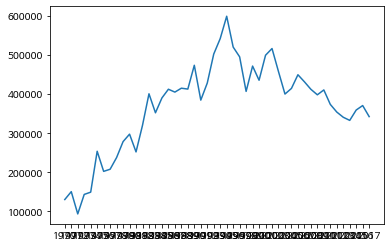

In [13]:
plt.plot(sr_one.index, sr_one.values)

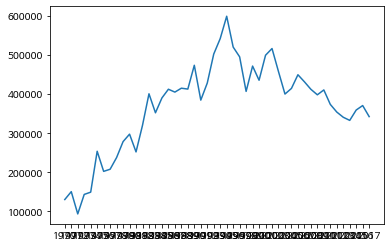

In [14]:
plt.plot(sr_one)

그래프 객체에 차트 제목을 추가할 때는 title() 함수를 사용한다.

x 축 이름은 xlabel(), y축은 ylabel() 을 활용한다.

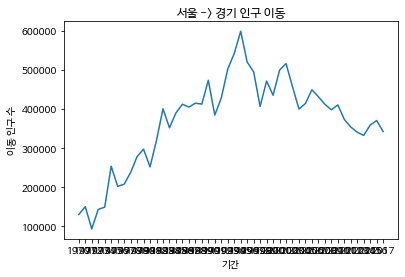

In [15]:
plt.plot(sr_one)
# 차트 제목
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구 수')

plt.show() # 변경사항을 저장하고 그래프 출력


x 축 눈금 라벨의 클씨가 서로 겹쳐서 잘 보이지 않는 문제를 해결해보자.

이것은 눈금 라벨이 들어갈만한 충분한 여유 공간이 없어서 발생하는 문제다.

1. 공간을 만들기 위해 figure() 함수로 그림틀의 가로 사이즈를 더 크게 설정한다.

2. xticks() 함수를 활용하여 x축 눈금 라벨을 반시계 방향으로 90도 회전하여 글씨가 겹치지 않도록 한다.

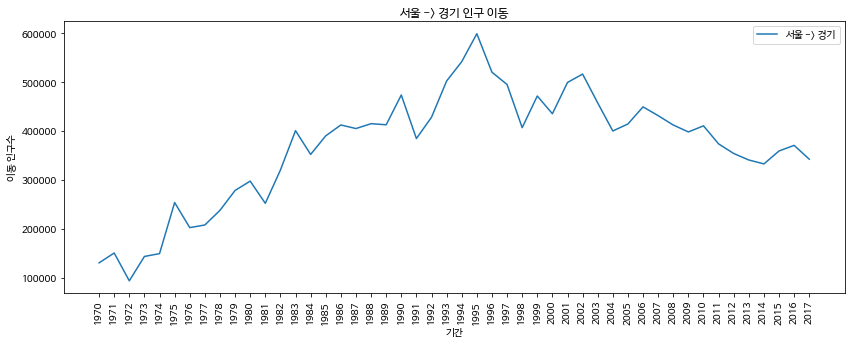

In [16]:
plt.figure(figsize=(14, 5)) # 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.xticks(rotation='vertical') # x 축 눈금 라벨 회전. vertical 대신에 90을 넣어도 된다.
plt.plot(sr_one)
plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름
plt.legend(labels=['서울 -> 경기'], loc='best')

plt.show()

Matplotlib의 스타일 서식 지정에 대해 알아보자. 색, 폰트 등 디자인적 요소를 사전에 지정된 스타일로 빠르게 일괄 변경한다. 단, 스타일 서식을 지정하는 것은 Matplotlib 실행 환경 설정을 변경하는 것이므로 다른 파일을 실행할 때도 계속 적용된다는 점을 유의하자.

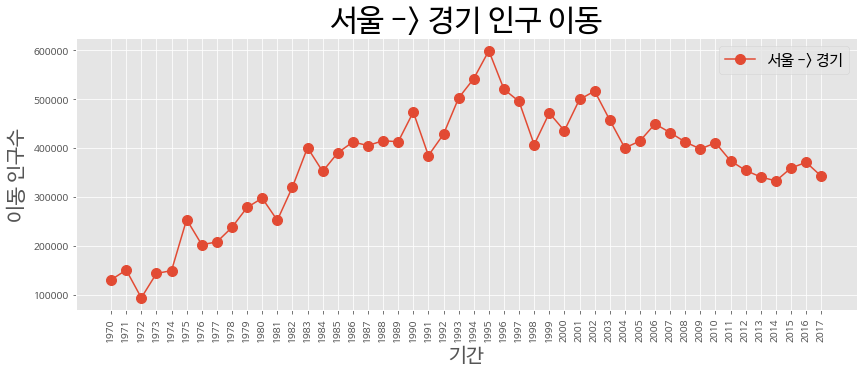

In [17]:
plt.style.use('ggplot') # 스타일 서식 지정
plt.figure(figsize=(14, 5)) # 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.xticks(size=10, rotation='vertical') # size=10 옵션을 추가하여 폰트 크기를 10으로  설정, x 축 눈금 라벨 회전.
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10) # 마커 표시 추가
plt.title('서울 -> 경기 인구 이동', size=30)  #차트 제목
plt.xlabel('기간', size=20)                  #x축 이름
plt.ylabel('이동 인구수', size=20)           #y축 이름
plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)

plt.show()

스타일의 종류 : 'classic','bmh','dark_background','fast','grayscale','seaborn' 등이 있다.

그래프에 대한 설명을 덧붙이는 주석에 대해 알아보자.

annotate() 함수를 사용. 주석 내용(텍스트)을 넣을 위치와 정렬 방법 등을 annotate() 함수에 함께 전달한다.

arrowprops 옵션을 사용하면 텍스트 대신 화살표가 표시된다. 화살표 스타일, 시작점과 끝점의 좌표를 입력.

주석을 넣을 여백 공간 확보를 위해 ylim() 함수를 사용하여 y축 범위를 먼저 늘리고, annotate() 함수 사용, 위치를 나타내는 (x,y) 좌료에서 x값은 인덱스 번호 사용. y좌표값에 들어갈 인구 수 데이터는 숫자값이므로 그대로 사용.

annotate() 함수의 rotation욥션에서 양의 회전 방향은 반시계방향이다. 글자를 위아래 세로 방향으로 정렬하는 va 옵션은 'center','top',bottom',baseline'이 있다. 좌우 가로 방향으로 정렬하는 ha 옵션에는 'center', 'left', 'right'가 있다.

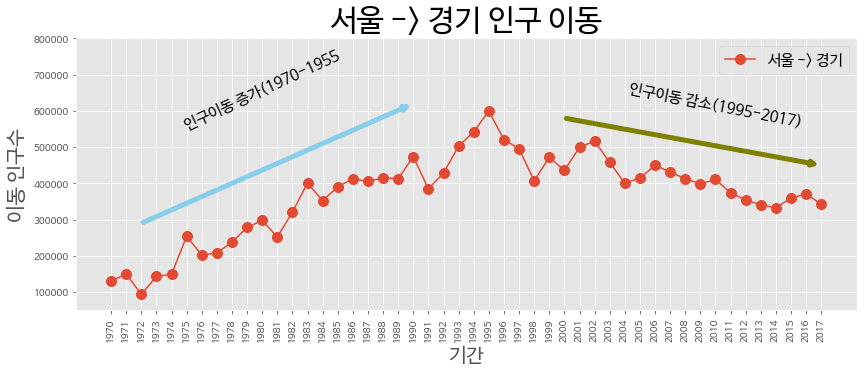

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(14,5))
plt.xticks(size=10, rotation=90)
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10) # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)

# y축 범위 지정(최소값, 최대값)
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
             xy=(20, 620000), # 화살표의 머리 부분(끝점)
             xytext=(2, 290000), # 화살표의 꼬리 부분(시작점)
             xycoords='data', # 좌표 체계
             arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), # 화살표 서식
             )

plt.annotate('',
             xy=(47,450000),
             xytext=(30, 580000),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', color='olive', lw=5)
             )

# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1955',
             xy=(10, 550000),
             rotation=25,
             va='baseline',
             ha='center',
             fontsize=15
             )

plt.annotate('인구이동 감소(1995-2017)',
             xy=(40, 560000),
             rotation=-11,
             va='baseline',
             ha='center',
             fontsize=15,
             )

plt.show()

화면 분할하여 그래프 여러 개 그래기 - axe 객체 활용

여러 개의 axe 객체를 만들고, 분할된 화면마다 axe 객체를 하나씩 배정한다. axe 객체는 각각 서로 다른 그래프를 표현할 수 있다.

figure() 함수를 사용하여 그래프를 그리는 그림틀(fig)를 만든다. figsize 옵션으로 (가로, 세로) 그림틀의 크기를 설정한다. fig 객체에 add_subplot() 메소드를 적용하여 그림틀을 여러 개로 분할한다. 이때 나눠진 각 부분을 axe 객체라고 한다.

add_subplot() 메소드의 인자에 "행의 크기, 열의 크기, 서브플롯 순서"를 입력.
각 axe 객체에 plot() 메소드를 적용하여 그래프 풀력.

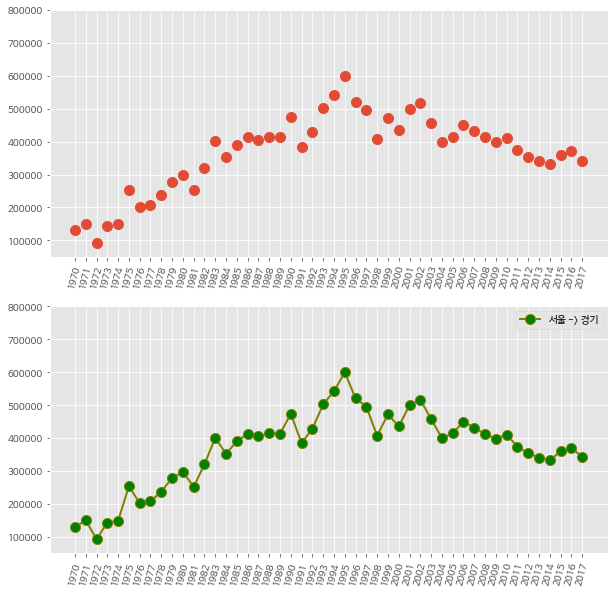

In [19]:
# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 axe 객체 생성
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize=10) # 점 그래프
# 마커 모양 ='o', makerfacecolor=마커 배경색, markersize=마커 크기, color=선의 색, linewidth=선의 두께
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10, color='olive', linewidth=2, label='서울 -> 경기')
ax2.legend(loc='best')

# y 축 범위 지정(최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()

위에서 그린 두번째 그래프에 제목과 축 이름 추가

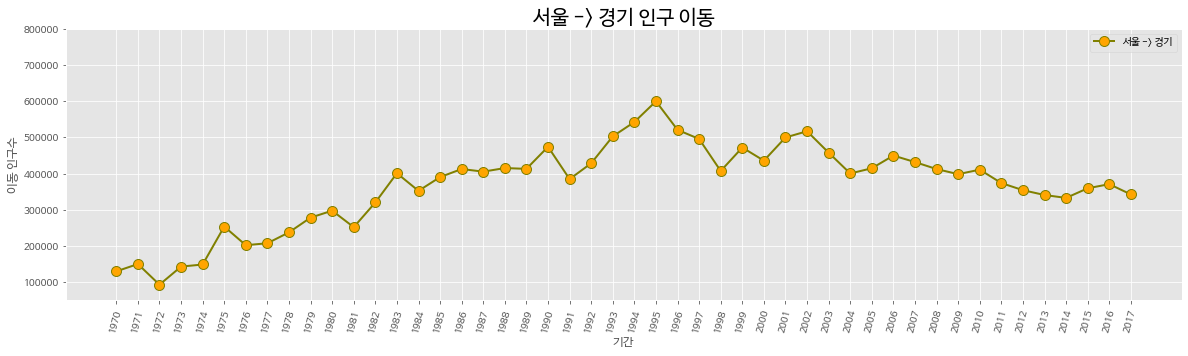

In [20]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1,1,1)

ax.plot(sr_one, marker='o', markerfacecolor='orange', markersize=10,
        color='olive', linewidth=2, label='서울 -> 경기')
ax.legend (loc='best')

ax.set_ylim(50000, 800000)
ax.set_title('서울 -> 경기 인구 이동', size=20)
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)
ax.set_xticklabels(sr_one.index, rotation=75)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.show()

동일 그림(axe 객체)에 여러 개의 그래프를 추가하는 것도 가능하다.

서울특별시에서 충청남도, 경상북도, 강원도로 이동한 인구 변화 그래프 3개를 하나의 같은 화면에 그려본다.

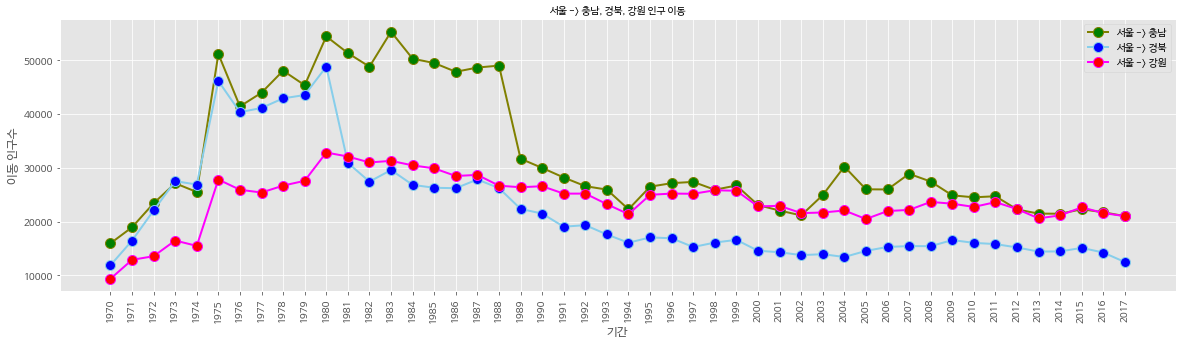

In [21]:
df = pd.read_excel('/content/drive/MyDrive/파이썬_머신러닝_판다스_데이터분석/Part4_Visualization_Tools/시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)
df = df.fillna(method='ffill')
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도','강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1,1,1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green', markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='red', markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')
ax.legend(loc='best')
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=10)
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)
ax.set_xticklabels(col_years, rotation=90)
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()

서울특별시에서 충청남도, 경상북도, 강원도, 전라남도 4개 지역으로 이동한 인구 변화 그래프를 그려보자. ax1~ax4까지 4개의 axe 객체 생성

각 지역에 해당하는 4개의 행을 선택하고, axe 객체에 하나씩 plot() 메소드 적용

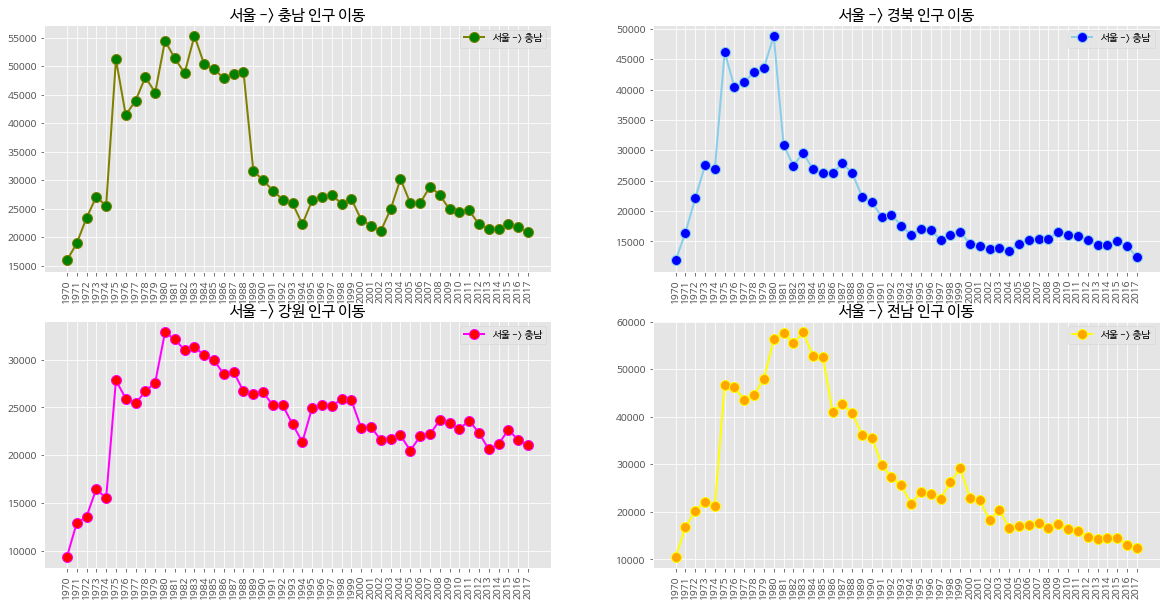

In [22]:
df = pd.read_excel('/content/drive/MyDrive/파이썬_머신러닝_판다스_데이터분석/Part4_Visualization_Tools/시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)
df = df.fillna(method='ffill')
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

plt.style.use('ggplot')
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(col_years, df_4.loc['충청남도',:], marker='o', markerfacecolor='green', markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax2.plot(col_years, df_4.loc['경상북도',:], marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=2, label='서울 -> 충남')
ax3.plot(col_years, df_4.loc['강원도',:], marker='o', markerfacecolor='red', markersize=10, color='magenta', linewidth=2, label='서울 -> 충남')
ax4.plot(col_years, df_4.loc['전라남도',:], marker='o', markerfacecolor='orange', markersize=10, color='yellow', linewidth=2, label='서울 -> 충남')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

ax1.set_title('서울 -> 충남 인구 이동', size=15)
ax2.set_title('서울 -> 경북 인구 이동', size=15)
ax3.set_title('서울 -> 강원 인구 이동', size=15)
ax4.set_title('서울 -> 전남 인구 이동', size=15)

ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show()

In [23]:
# matplotlib에서 사용할 수 있는 색의 종류
import matplotlib
color = {}
for name, hex in matplotlib.colors.cnames.items():
    color[name] = hex

for i in color:
    print(i, ':', color[i])

aliceblue : #F0F8FF
antiquewhite : #FAEBD7
aqua : #00FFFF
aquamarine : #7FFFD4
azure : #F0FFFF
beige : #F5F5DC
bisque : #FFE4C4
black : #000000
blanchedalmond : #FFEBCD
blue : #0000FF
blueviolet : #8A2BE2
brown : #A52A2A
burlywood : #DEB887
cadetblue : #5F9EA0
chartreuse : #7FFF00
chocolate : #D2691E
coral : #FF7F50
cornflowerblue : #6495ED
cornsilk : #FFF8DC
crimson : #DC143C
cyan : #00FFFF
darkblue : #00008B
darkcyan : #008B8B
darkgoldenrod : #B8860B
darkgray : #A9A9A9
darkgreen : #006400
darkgrey : #A9A9A9
darkkhaki : #BDB76B
darkmagenta : #8B008B
darkolivegreen : #556B2F
darkorange : #FF8C00
darkorchid : #9932CC
darkred : #8B0000
darksalmon : #E9967A
darkseagreen : #8FBC8F
darkslateblue : #483D8B
darkslategray : #2F4F4F
darkslategrey : #2F4F4F
darkturquoise : #00CED1
darkviolet : #9400D3
deeppink : #FF1493
deepskyblue : #00BFFF
dimgray : #696969
dimgrey : #696969
dodgerblue : #1E90FF
firebrick : #B22222
floralwhite : #FFFAF0
forestgreen : #228B22
fuchsia : #FF00FF
gainsboro : #DCDC

* 면적 그래프

면적 그래프(area plot)는 각 열의 데이터를 선 그래프로 구현하는데, 선 그래프와 x축 사이의 공간에 색이 입혀진다. 색의 투명도(alpha)는 기본값 0,5로 투과되어 보인다(투명도 : 0~1 범위). 선 그래프를 그리는 plot() 메소드에 kind='area' 옵션 추가.

그래프 누적 - stacked = True (기본값). 각 열의 선 그래프를 다른 열의 선 그래프 위로 쌓아 올리는 방식으로 표현된다.


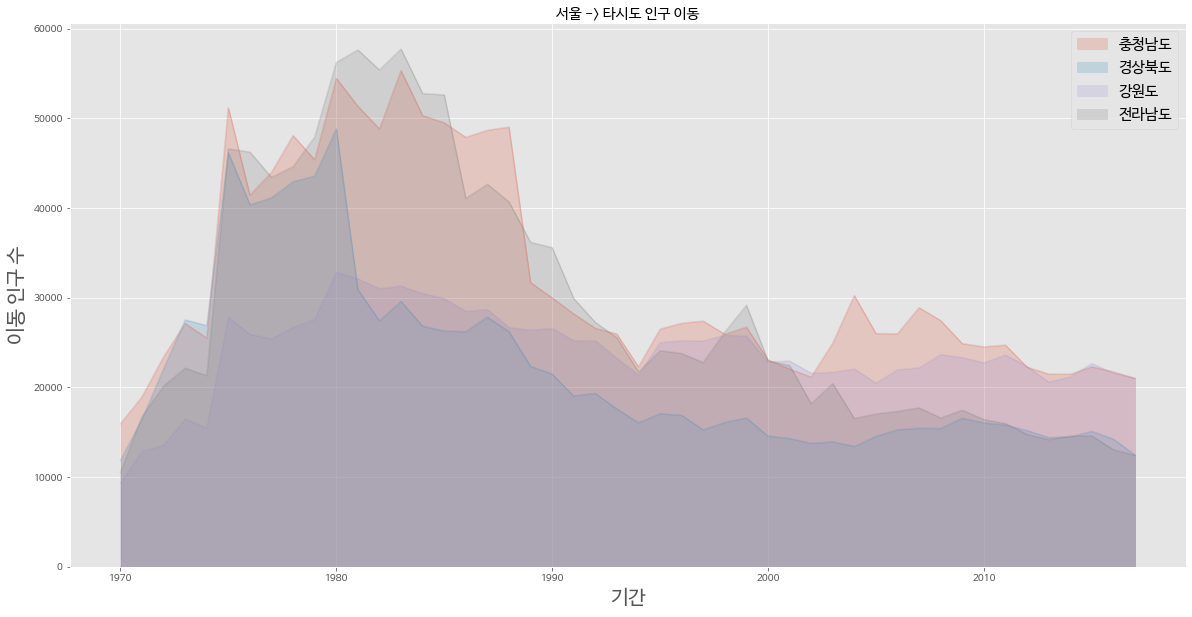

In [24]:
# stacked=False
df = pd.read_excel('/content/drive/MyDrive/파이썬_머신러닝_판다스_데이터분석/Part4_Visualization_Tools/시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)
df = df.fillna(method='ffill')
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

plt.style.use('ggplot')

df_4.index = df_4.index.map(int)

df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20, 10))
plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

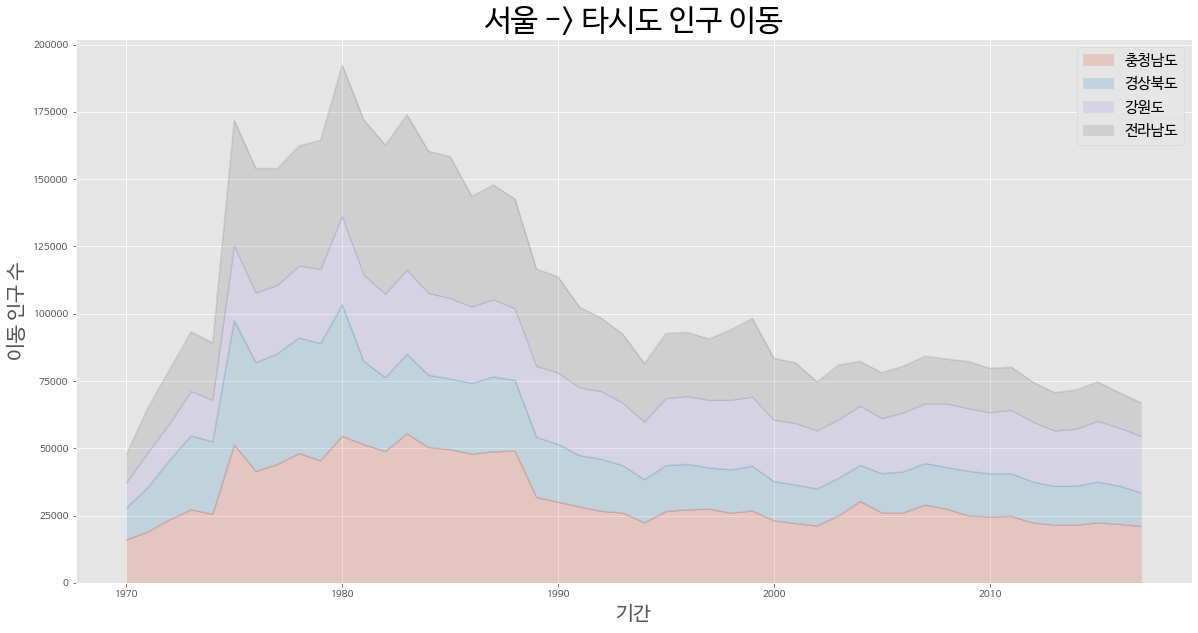

In [25]:
# stacked=True
df_4.index = df_4.index.map(int)
df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>


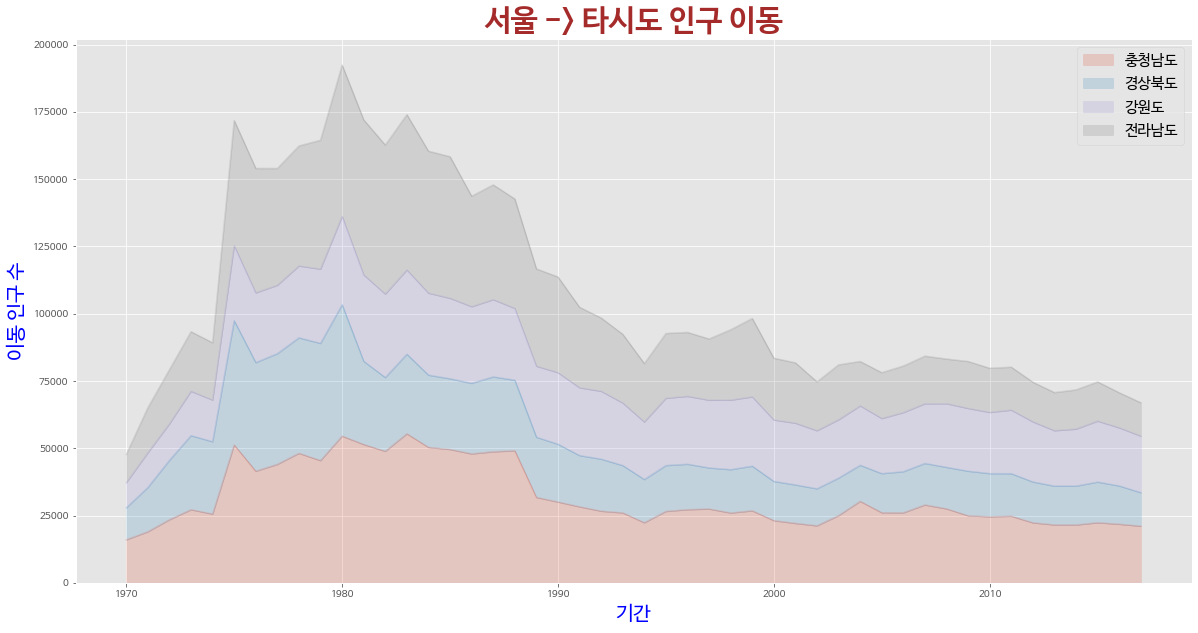

In [26]:
# axe 객체의 세수적인 요소 설정 - 제목, 축
ax = df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
print(type(ax))

ax.set_title('서울 -> 타시도 인구 이동', size=30, color='brown', weight='bold')
ax.set_ylabel('이동 인구 수', size=20, color='blue')
ax.set_xlabel('기간', size=20, color='blue')
ax.legend(loc='best', fontsize=15)

plt.show()

* 막대 그래프

막대 그래프는 데이터 값의 크기에 비례하여 높이를 갖는 직사각형 막대로 표현한다.
세로형 막대 그래프는 시간적으로 사이가 나는 두 점에서 데이터 값의 차이를 잘 설명한다. 즉, 시계열 데이터를 표현하는데 적합하다. plot() 메소드에 kind='bar'옵션을 입력한다.

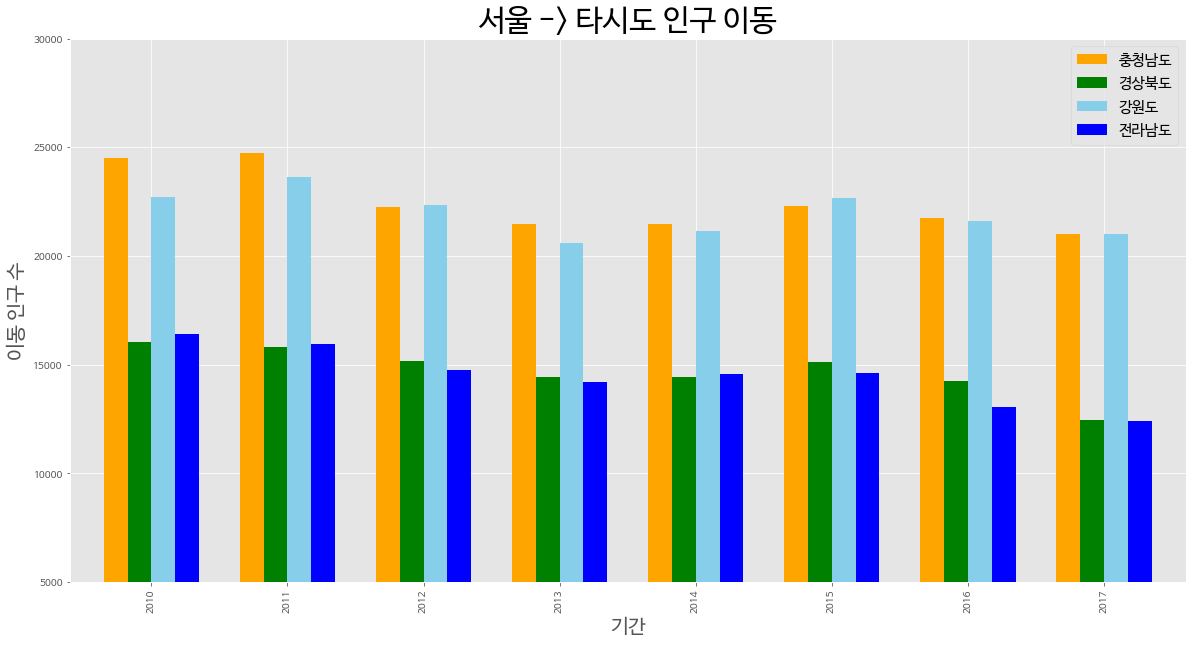

In [27]:
col_years = list(map(str, range(2010, 2018))) # 2010년 ~ 2017년에 해당하는 데이터
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

plt.style.use('ggplot')

df_4.index = df_4.index.map(int)

df_4.plot(kind='bar', figsize=(20, 10), width=0.7, color=['orange', 'green', 'skyblue', 'blue'])
plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)

plt.show()

가로형 막대 그래프는 각 변수 사이의 값의 크기를 설명하는데 적합. plot() 메소드의 옵션으로 kind='barh'

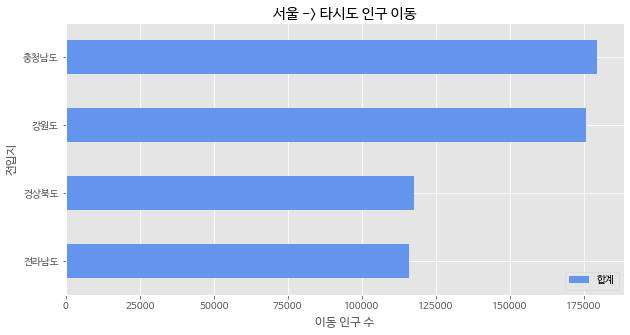

In [28]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

# 2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4['합계'] = df_4.sum(axis=1)

# 가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)

# 스타일 서식 지정
plt.style.use('ggplot') 

# 수평 막대 그래프 그리기
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10, 5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

보조축 활용하기(2축 그래프)

위에서는 그래프를 그릴때 y축 한 개만 사용하였다. 이번에는 보조 축을 추가하여 2개의 y축을 갖는 그래프를 그릴 수 있다. 

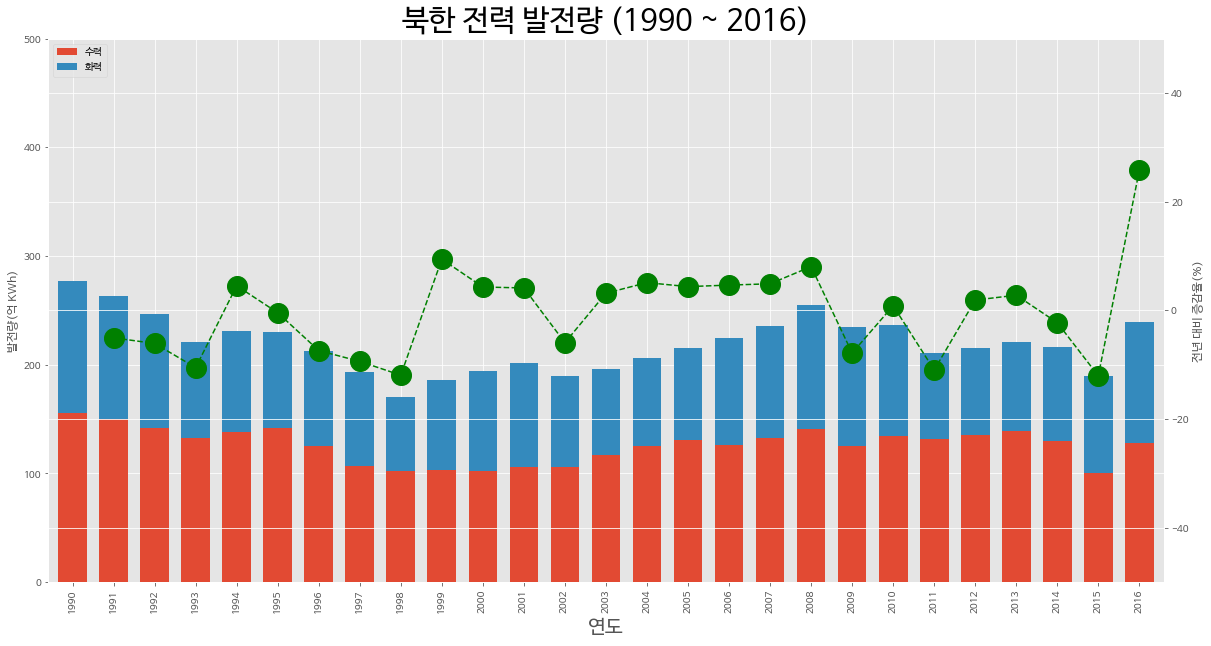

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus']=False # 마이너스 부호 출력 설정

df = pd.read_excel('/content/drive/MyDrive/파이썬_머신러닝_판다스_데이터분석/Part4_Visualization_Tools/남북한발전전력량.xlsx', engine='openpyxl', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T

# 증감율(변동율) 계산 - rename() 메소드로 '합계'열의 이름을 '총발전량'으로 바꾸고
df = df.rename(columns={'합계':'총발전량'})
# shift() 메소드를 이용하여 '총발전량'열의 데이터를 1행씩 뒤로 이동시켜서 '총발전량 - 1년'열을 새로 생성
df['총발전량 - 1년'] = df['총발전량'].shift(1)
# 두 열의 데이터를 이용하여 전년도 대비 변동율을 계산한 결과를 '증감율'열에 저장
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) -1) * 100

# 2축 그래프 그리기
# stacked=True 옵션을 지정하여, '수력' '화력' 열의 값을 아래 위로 쌓은 형태의 세로형 막대
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)
ax2 = ax1.twinx() # twinx() 메소드로 쌍둥이 객체 만듬
# ax2를 그리는데 사용할 데이터는 '증감율' 열에서 가져옴, ls='--' : 선 스타일을 점선으로 설정
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20, color='green', label='전년대비 증감율(%)')

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')

plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30)
ax1.legend(loc='upper left')

plt.show()

* 히스토그램

히스토그램(histogram)은 변수가 하나인 단변수 데이터의 빈도수를 그래프로 표현한다. x축을 같은 크기의 여러 구간을오 나누고 각 구간에 속하는 데이터 값의 개수(빈도)를 y축에 표시한다.

plot() 메소드에 kind='hist' 옵션을 넣고, bins=10 옵션을 지정하여 10개 구간으로 나눈다.

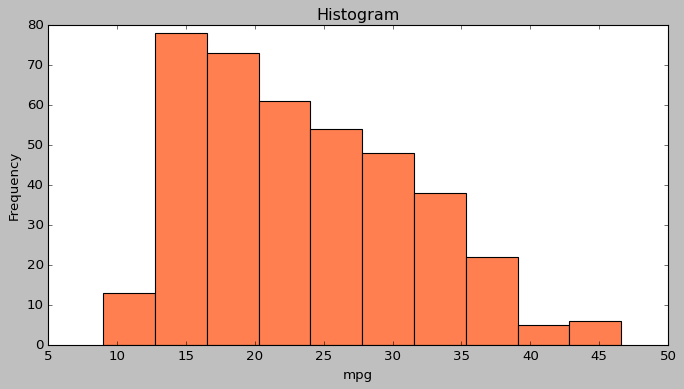

In [30]:
plt.style.use('classic') # 스타일 서식 지정

df = pd.read_csv('/content/drive/MyDrive/파이썬_머신러닝_판다스_데이터분석/Part4_Visualization_Tools/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight', 'acceleration','model year','origin','name']
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10, 5))

plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

* 산점도

산점도(scatter plot)는 서로 다른 두 변수 사이의 관계를 나타낸다. 이때 각 변수는 연속되는 값을 갖는다. 일반적으로 정수형(int64) 또는 실수형(float64) 값이다. 2개의 연속 변수를 각각 x축과 y축에 하나씩 놓고, 데이터 값이 위치하는 (x, y) 좌표를 찾아서 점으로 표시한다.

plot() 메소드에 kind='scatter' 옵션을 사용하여 산점도를 그린다. x='weight' 옵션을 사용하여 x축에 위치할 변수(데이터프레임의 열)을 선택한다. 마찬가지로 y='mpg' 옵션을 지정하여 'mpg'열을 y축에 놓은 변수로 선택한다. 점의 색상(c)과 크기(s)를 설정하는 옵션을 추가한다.

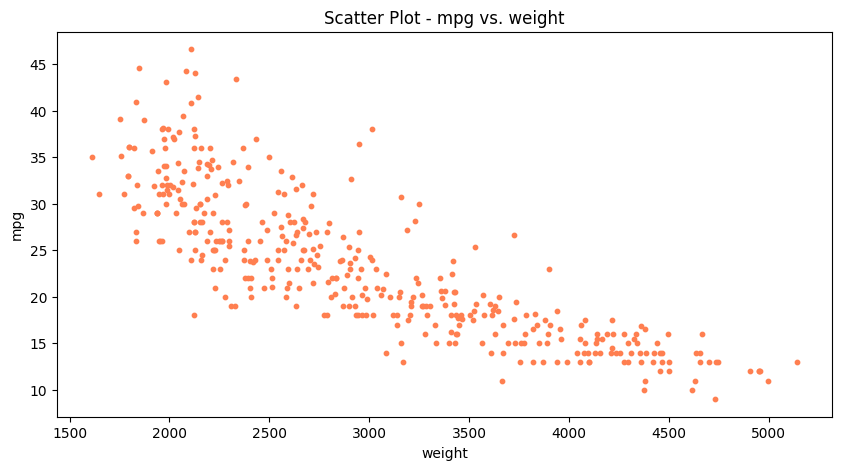

In [31]:
plt.style.use('default')
df = pd.read_csv('/content/drive/MyDrive/파이썬_머신러닝_판다스_데이터분석/Part4_Visualization_Tools/auto-mpg.csv', header=None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

df.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.title('Scatter Plot - mpg vs. weight')
plt.show()

위 산점도에 새로운 변수를 추가해 점의 크기 또는 색상으로 표현할 수 있다. 이번에는 3번째 변수로 실린더 개수('cylinders')를 추가해보자.


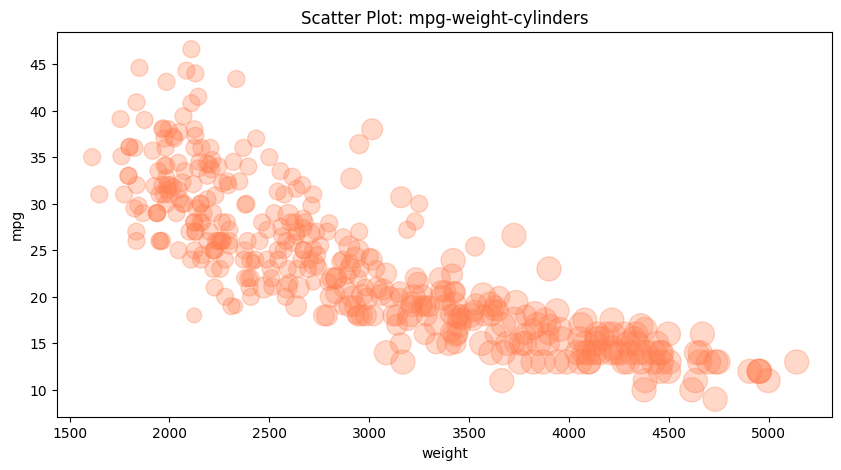

In [32]:
plt.style.use('default')
df = pd.read_csv('/content/drive/MyDrive/파이썬_머신러닝_판다스_데이터분석/Part4_Visualization_Tools/auto-mpg.csv', header=None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300 # 0~1 범위의 실수 값의 배열(시리즈)이다.


df.plot(kind='scatter', x='weight', y='mpg', c='coral', figsize=(10, 5),
        s=cylinders_size, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.show()

그래프를 그림 파일 저장

matplotlib 라이브러리로 생성한 그래프를 그림 파일로 저장하는 방법이다. savefig() 함수에 저장하려는 파일의 이름과 파일 경로를 설정한다. 앞에서 그린 산점도를 저장해보겠다. 그리고 이와 별도로 transparent=True 옵션으로 그림 배경을 투명하게 지정하여 저장해보겠다.

이 옵션을 사용할 그래프는 위 산점도와 다르게 marker='+'옵션으로 점의 모양을 바꿀 것이다. c 옵션에 cylinders_size를 할당하여 값에 따라 다른 생삭으로 표현한다. 색상을 정하는 컬러맵(cmap)으로 'viridis' 옵션을 사용한다.

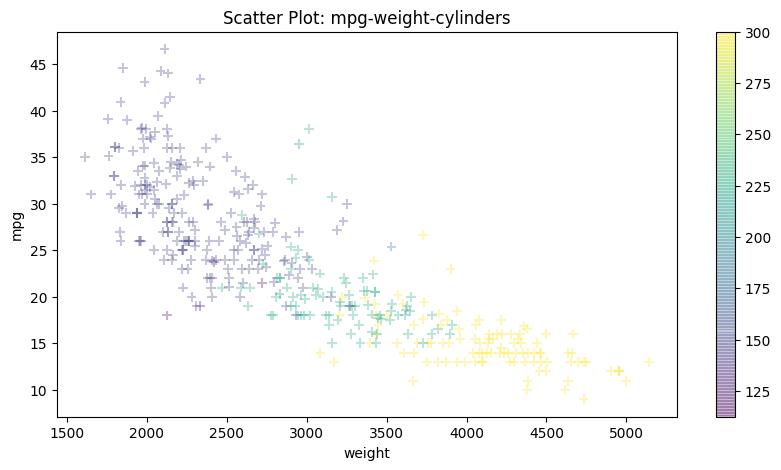

In [33]:
plt.style.use('default')   # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('/content/drive/MyDrive/파이썬_머신러닝_판다스_데이터분석/Part4_Visualization_Tools/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

df.plot(kind='scatter', x='weight', y='mpg', marker='+', figsize=(10, 5),
        cmap='viridis', c=cylinders_size, s=50, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.savefig("./scatter.png")
plt.savefig("./scatter_transparent.png", transparent=True)
plt.show()

* 파이 차트

파이 차트(pie chart)는 원을 파이 조각처럼 나누어서 표현한다. 조각의 크기를 해당 변수가 속하는 데이터 값의 크기에 비례한다. plot() 메소드에 kind='pie' 옵션을 사용하여 그린다.

           mpg  cylinders  displacement  ...  acceleration  model year  count
origin                                   ...                                 
1       5000.8       1556       61229.5  ...        3743.4       18827    249
2       1952.4        291        7640.0  ...        1175.1        5307     70
3       2405.6        324        8114.0  ...        1277.6        6118     79

[3 rows x 7 columns]


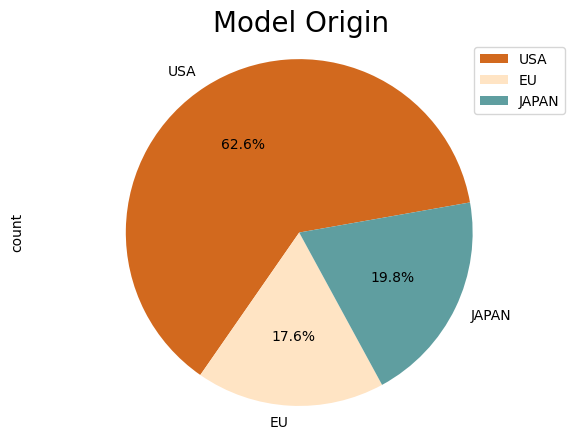

In [34]:
plt.style.use('default')   # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv('/content/drive/MyDrive/파이썬_머신러닝_판다스_데이터분석/Part4_Visualization_Tools/auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

# 데이터 개수 카운트를 위해 값 1을 가진 열을 추가
df['count'] = 1
df_origin = df.groupby('origin').sum() # origin 열을 기준으로 그룹화하고 각 그룹별 합계를 구함
print(df_origin.head())

# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA', 'EU', 'JAPAN']

# 제조국가(origin) 열에 대한 파이 차트 그리기 - count 열 데이터 사용
df_origin['count'].plot(kind='pie',
                        figsize=(7,5),
                        autopct='%1.1f%%',
                        startangle=10,
                        colors=['chocolate', 'bisque', 'cadetblue']
                        )

plt.title('Model Origin', size=20)
plt.axis('equal') # 파이ㅣ 차트의 비율을 같게 (원에 가깝게) 조정
plt.legend(labels=df_origin.index, loc='upper right')
plt.show()

* 박스 플롯

박스 플롯(boxplot)은 범주형 데이터의 분포를 파악하는데 적합.


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


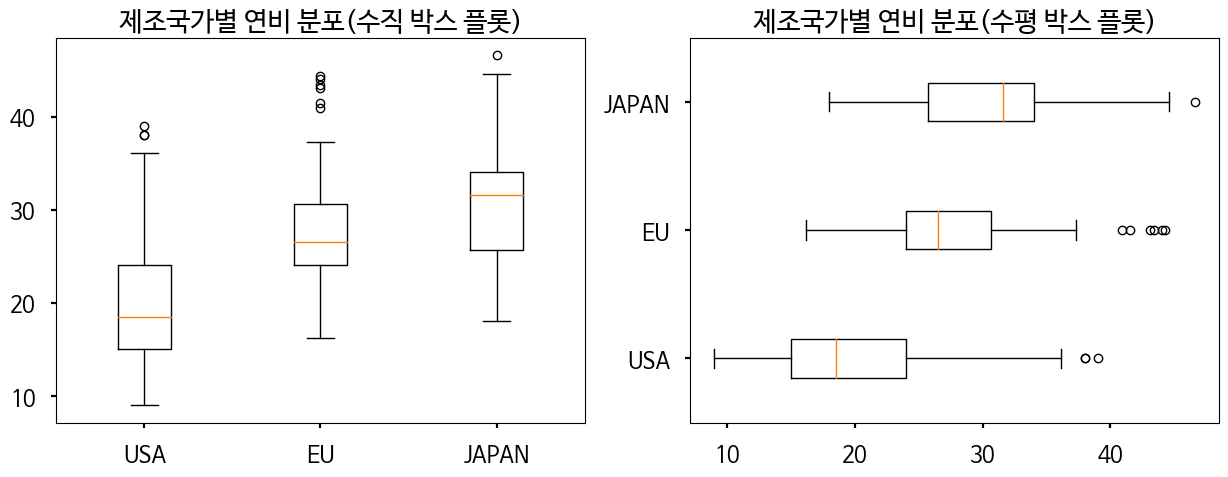

In [40]:
plt.style.use('seaborn-poster')
plt.rcParams['axes.unicode_minus']=False # 마이너스 부호 출력 설정

df = pd.read_csv('/content/drive/MyDrive/파이썬_머신러닝_판다스_데이터분석/Part4_Visualization_Tools/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels=['USA','EU','JAPAN'])
ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels=['USA','EU','JAPAN'],
            vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()